# Import lib

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# Import data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

DATA_DIR = os.path.join(
    path,
    "asl_alphabet_train",
    "asl_alphabet_train"
)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\grassknoted\asl-alphabet\versions\1


# Load model

In [3]:
loaded_model = keras.models.load_model("asl_alphabet_model.h5")
loaded_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,936,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,941,023 (15.03 MB)

 Trainable params: 3,941,021 (15.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Predict

In [4]:
IMG_SIZE = 64
BATCH_SIZE = 32

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2
)

train_data = datagen.flow_from_directory(
    DATA_DIR,
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset='training'
)

class_name = train_data.class_indices
class_name = dict((v, k) for k, v in class_name.items())
print(class_name)

Found 69600 images belonging to 29 classes.
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}


In [10]:
from glob import glob
test_images = glob(os.path.join(path, "asl_alphabet_test", "asl_alphabet_test", "*.jpg"))
test_images[:5]

['C:\\Users\\Admin\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\A_test.jpg',
 'C:\\Users\\Admin\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\B_test.jpg',
 'C:\\Users\\Admin\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\C_test.jpg',
 'C:\\Users\\Admin\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\D_test.jpg',
 'C:\\Users\\Admin\\.cache\\kagglehub\\datasets\\grassknoted\\asl-alphabet\\versions\\1\\asl_alphabet_test\\asl_alphabet_test\\E_test.jpg']

# Predict

In [11]:
%matplotlib inline

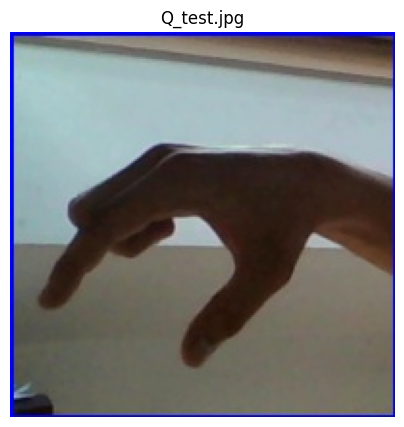

In [16]:
import cv2
test_img_path = test_images[17]
img = cv2.imread(test_img_path)
plt.rcParams['figure.figsize'] = [5, 5]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(test_img_path.split("\\")[-1])
plt.axis('off')
plt.show()

In [17]:
img = image.load_img(test_img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = img_array/255.0
img_array = np.expand_dims(img_array, axis=0)

predictions = loaded_model.predict(img_array)
print(predictions)
predicted_class = np.argmax(predictions, axis=1)[0]
print("Predicted class index:", class_name[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
[[1.3556251e-34 0.0000000e+00 3.1248340e-24 5.1488620e-37 1.3677367e-21
  0.0000000e+00 3.4503293e-28 2.6656024e-13 9.4724748e-31 3.7896292e-15
  0.0000000e+00 2.4644474e-28 3.8101864e-29 2.4939432e-14 1.3878535e-13
  1.5701052e-02 9.7935390e-01 0.0000000e+00 2.7617131e-21 7.0520242e-33
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.7109383e-32
  1.0026524e-36 4.9449774e-03 2.9277430e-13 1.7391469e-23]]
Predicted class index: Q
